<a href="https://colab.research.google.com/github/lee-euijin/AppleFarm/blob/main/Model/skeleton_preprocessing_and_Model_Learning_data_augmenting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data upload

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip
import zipfile, shutil

dataset = '/content/drive/My Drive/학교 수업 자료/딥러닝/Project/static_data.zip'
dst_path = '/content/static_data'
dst_file = os.path.join(dst_path, 'static_data.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Mounted at /content/gdrive


In [ ]:
import os
imagepaths = []

for dirname, _, filenames in os.walk('/content/static_data'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      imagepaths.append(path)

print(len(imagepaths))
print(imagepaths[0])

40000
/content/static_data/leapgestrecog/leapGestRecog/02/07_ok/frame_02_07_0145.png


In [ ]:
# google drive에 directory 추가
dir_path = '/content/drive/My Drive/학교 수업 자료/딥러닝/Project/static_skeleton_data'

for path in imagepaths[:19999]:
  splitted = path.split("/")

  # 없으면 directory 추가
  dir = os.path.join(dir_path, splitted[5])

  if not os.path.exists(dir):
    os.makedirs(dir)

  dir = os.path.join(dir_path, splitted[5], splitted[6])

  if not os.path.exists(dir):
    os.makedirs(dir)

NameError: ignored

## Data Preprocessing

In [ ]:
!pip install mediapipe opencv-python

     |████████████████████████████████| 36.1MB 85kB/s 


### Data Preprocessing and Saving

In [ ]:
# 최초 save 이후에는 이 셀 실행하지 않음!
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import mediapipe as mp
from google.colab.patches import cv2_imshow

new_path = []

# 저장을 위한 path 생성
for path in imagepaths[:19999]:
  splitted = path.split("/")
  temp = '/' + splitted[5] + '/' + splitted[6] + '/' + splitted[7]
  new_path.append(temp)

# train data preprocessing and save
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx in range(19999):
    # read an image, flip it around y-axis for correct handedness output
    image = cv.imread(imagepaths[idx])
    # convert the bgr image to rgb before processing
    results = hands.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    # print handedness and draw hand landmarks on the image
    # print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()

    # landmark만 그릴 image
    landmark_image = np.zeros(image.shape)
    for hand_landmarks in results.multi_hand_landmarks:
      '''print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height}'
      )'''
      mp_drawing.draw_landmarks(
          landmark_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    '''# imshow
    cv2_imshow(annotated_image)
    cv2_imshow(landmark_image)'''
    
    # save
    cv.imwrite(dir_path + new_path[idx], landmark_image)

IndexError: ignored

* index를 잘못 설정하여 에러가 발생했지만, 정상적으로 모두 저장되었다.

### 우리가 만든 training data 추가, path 확인

In [ ]:
import os
dir_path = '/content/drive/My Drive/static_skeleton_data'
skeletonpaths = []

for dirname, _, filenames in os.walk(dir_path):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    
    if path.endswith("png"):
      skeletonpaths.append(path)

print(len(skeletonpaths))
print(skeletonpaths[0])

8668
/content/drive/My Drive/static_skeleton_data/09/05_thumb/frame_09_05_0035.png


## Training

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

In [ ]:
# Creating trainig set and labels
X = []
y = []

for path in skeletonpaths[:8668]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128, 128))
  X.append(img)
  print(len(X))

  # labels
  category = path.split("/")[6] # path에서 6번째가 label
  label = int(category.split("_")[0][1])
  y.append(label)

X = np.array(X)
X = X.reshape(len(skeletonpaths), 128, 128, 1)
y = np.array(y)

print("이미지 개수 : ", len(X))
print("라벨 개수 : ", len(y))
print(y[0], skeletonpaths[0])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864

In [ ]:
# data 저장
'''
import pickle

with open('/content/drive/My Drive/학교 수업 자료/딥러닝/Project/input_data_made.pickle', 'wb') as f:
  pickle.dump(X, f, pickle.HIGHEST_PROTOCOL)

with open('/content/drive/My Drive/학교 수업 자료/딥러닝/Project/label_data_made.pickle', 'wb') as f:
  pickle.dump(y, f, pickle.HIGHEST_PROTOCOL)
  '''

np.save('/content/drive/My Drive/made_added_987/input_data_made_added_987.npy', X)
np.save('/content/drive/My Drive/made_added_987/label_data_made_added_987.npy', y)

In [ ]:
# 저장한 image data 불러오기
'''
import pickle

with open('/content/drive/My Drive/학교 수업 자료/딥러닝/Project/input_data_made.pickle', 'rb') as f:
  X = pickle.load(f)

with open('/content/drive/My Drive/학교 수업 자료/딥러닝/Project/label_data_made.pickle', 'rb') as f:
  y = pickle.load(f)
'''
X = []
y = []
X = np.load('/content/drive/My Drive/made_added_987/input_data_made_added_987.npy')
y = np.load('/content/drive/My Drive/made_added_987/label_data_made_added_987.npy')

In [ ]:
print(len(X))
print(len(y))

8668
8668


In [ ]:
X[0].shape

(128, 128, 1)

In [ ]:
# data 저장 잘 됐는지 확인
X_ = np.load('/content/drive/My Drive/made_added_987/input_data_made_added_987.npy')

print(np.array_equal(X, X_))

True


In [ ]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# model
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40, # range 내에서 random하게 data 회전시킴
                             width_shift_range=0.1, # range 내에서 translation
                             height_shift_range=0.1, # range 내에서 translation
                             shear_range=0.1, # range 내에서 affine
                             zoom_range=0.1, # range 내에서 zoom
                             horizontal_flip=False, # 거울모드는 오른손만 detecting해야하므로 false
                             fill_mode='nearest', # 빈 공간을 채울 방법 : 가장 가까운 값
                             validation_split=0.1) # validation split 가능

train_generator_10 = train_datagen.flow_from_directory('/content/drive/My Drive/static_skeleton_data/10',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       subset='training')

train_generator_11 = train_datagen.flow_from_directory('/content/drive/My Drive/static_skeleton_data/11',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       subset='training')

validation_generator_10 = train_datagen.flow_from_directory('/content/drive/My Drive/static_skeleton_data/10',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        subset='validation')

validation_generator_11 = train_datagen.flow_from_directory('/content/drive/My Drive/static_skeleton_data/11',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        subset='validation')

# DirectoryIterator (train_generator) 합치기
class MergeDI():
    def __init__(self, *gens):
        self.gens = gens

    def generate(self):
        while True:
            for g in self.gens:
                yield next(g)

    def __len__(self):
        return sum([len(g) for g in self.gens])

train_generator = MergeDI(train_generator_10, train_generator_11)
validation_generator = MergeDI(validation_generator_10, validation_generator_11)

print(len(train_generator_10))
print(len(train_generator_11))
print(len(train_generator))
print(len(validation_generator_10))
print(len(validation_generator_11))
print(len(validation_generator))

Found 2118 images belonging to 10 classes.
Found 2063 images belonging to 10 classes.
Found 229 images belonging to 10 classes.
Found 225 images belonging to 10 classes.
67
65
132
8
8
16


* steps_per_epoch = train data 개수 (8668*0.9) / batch size (32) = 약 240
* validation_steps = validation data 개수 (8668*0.1) / batch size (32) = 약 30

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator.generate(), steps_per_epoch=240, epochs=20, 
          validation_data=validation_generator.generate(), validation_steps=30)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
240/240 [==============================] - 200s 834ms/step - loss: 0.1033 - accuracy: 0.9660 - val_loss: 0.1469 - val_accuracy: 0.9579
Epoch 2/20
240/240 [==============================] - 53s 220ms/step - loss: 0.0801 - accuracy: 0.9764 - val_loss: 0.1308 - val_accuracy: 0.9598
Epoch 3/20
240/240 [==============================] - 51s 215ms/step - loss: 0.0941 - accuracy: 0.9701 - val_loss: 0.1141 - val_accuracy: 0.9668
Epoch 4/20
240/240 [==============================] - 51s 214ms/step - loss: 0.0842 - accuracy: 0.9704 - val_loss: 0.1186 - val_accuracy: 0.9621
Epoch 5/20
240/240 [==============================] - 52s 216ms/step - loss: 0.0660 - accuracy: 0.9795 - val_loss: 0.1645 - val_accuracy: 0.9467
Epoch 6/20
240/240 [==============================] - 54s 224ms/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 0.1055 - val_accuracy: 0.9609
Epoch 7/20
240/240 [==============================] - 53s 220ms/step - loss: 0.0663 - accuracy: 0.9787 - val_loss: 0.1253 - val_a

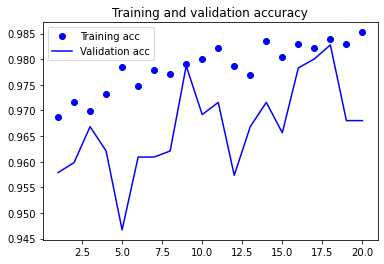

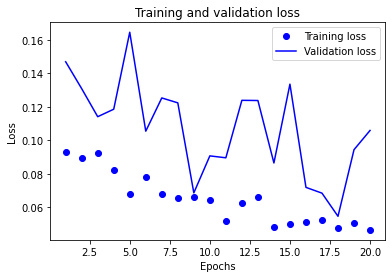

In [ ]:
# plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# model save
from tensorflow import keras
model.save('/content/drive/My Drive/made_augmentation/model_made_augmentation.h5')